In [21]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Context
This is a sales data from an individual company.

#### Content
This dataset includes about 40,000 rows and 15 feature variables. Each row corresponds to a customer infomation, and includes the variables:

**flag:** Whether the customer has bought the target product or not <br/>
**gender:** Gender of the customer <br/>
**education:** Education background of customer <br/>
**house_val:** Value of the residence the customer lives in <br/>
**age:** Age of the customer by group <br/>
**online:** Whether the customer had online shopping experience or not <br/>
**customer_psy:** Variable describing consumer psychology based on the area of residence <br/>
**marriage:** Marriage status of the customer <br/>
**children:** Whether the customer has children or not <br/>
**occupation:** Career information of the customer <br/>
**mortgage:** Housing Loan Information of customers <br/>
**house_own:** Whether the customer owns a house or not <br/>
**region:** Information on the area in which the customer are located <br/>
**car_prob:** The probability that the customer will buy a new car (1 means the maximum possible）<br/>
**fam_income:** Family income Information of the customer (A means the lowest, and L means the highest) <br/>

In [22]:
df = pd.read_csv('sales_data.csv')
df.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H


In [23]:
# shape of dataframe
df.shape

(40000, 15)

In [24]:
# dataframe dtypes for each feature
df.dtypes

flag            object
gender          object
education       object
house_val        int64
age             object
online          object
customer_psy    object
marriage        object
child           object
occupation      object
mortgage        object
house_owner     object
region          object
car_prob         int64
fam_income      object
dtype: object

### Missing values
Replace 'Unknown' categories with null values

In [25]:
# Print unique values in each column
feats = df.columns.tolist()
for feat in feats:
    print(feat, df[feat].unique())

flag ['Y' 'N']
gender ['M' 'F' 'U']
education ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online ['N' 'Y']
customer_psy ['B' 'E' 'C' 'J' 'A' 'G' 'F' 'I' 'D' 'H' 'U']
marriage [nan 'Single' 'Married']
child ['U' 'Y' 'N' '0']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['1Low' '2Med' '3High']
house_owner [nan 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
car_prob [1 3 2 7 5 6 9 8 4 0]
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']


In [10]:
# Letter 'U' and '1_Unk' stand for unknown values, replace them with np.nan where needed
for feat in feats:
    df[feat][(df[feat]=='U')] = np.nan
    df[feat][(df[feat]=='1_Unk')] = np.nan

/Users/emilolbinado/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# How many missing values are in each column?
for feat in feats:
    print(feat, df[feat].isnull().sum())

flag 0
gender 1151
education 741
house_val 0
age 6709
online 0
customer_psy 127
marriage 14027
child 8528
occupation 0
mortgage 0
house_owner 3377
region 0
car_prob 0
fam_income 153


In [28]:
# relative
df.isnull().sum() / df.shape[0] * 100

flag             0.0000
gender           2.8775
education        1.8525
house_val        0.0000
age             16.7725
online           0.0000
customer_psy     0.3175
marriage        35.0675
child           21.3200
occupation       0.0000
mortgage         0.0000
house_owner      8.4425
region           0.0000
car_prob         0.0000
fam_income       0.3825
dtype: float64

In [29]:
# Drop a column if the proportion of missing values there is large
toDrop = ['age', 'marriage', 'child']
df.drop(toDrop, inplace=True, axis=1)

In [30]:
def category_stackedbar(df, category):
    '''Returns stacked bar plot'''
    return pd.DataFrame(
        df.groupby(category).count()['flag'] / df.groupby(category).count()['flag'].sum() * 100).rename(columns={"flag": "%"}).T.plot(
            kind='bar', 
            stacked=True
    )

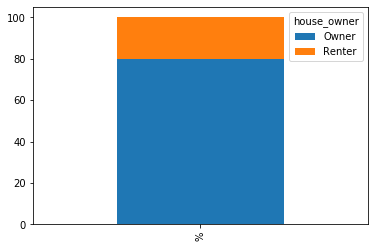

In [32]:
category_stackedbar(df, 'house_owner')

In [33]:
df['house_owner'] = df['house_owner'].fillna(df.mode()['house_owner'][0])

In [35]:
df.house_owner.isna().sum()

0

In [36]:
# Replace missing values for categorical variables with mode where appropriate
df['gender'] = df['house_owner'].fillna(df.mode()['house_owner'][0])
df['education'] = df['education'].fillna(df.mode()['education'][0])
df['customer_psy'] = df['customer_psy'].fillna(df.mode()['customer_psy'][0])
df['fam_income'] = df['fam_income'].fillna(df.mode()['fam_income'][0])

In [38]:
# Impute missing values where needed
df.isna().any()

flag            False
gender          False
education       False
house_val       False
online          False
customer_psy    False
occupation      False
mortgage        False
house_owner     False
region          False
car_prob        False
fam_income      False
dtype: bool

In [ ]:
# Use pandas drop.na function for columns where the proportion of missing values is small

df = df.dropna(subset=['column1', 'column2'])

In [39]:
# checking number of missing values
df.isnull().sum()

flag            0
gender          0
education       0
house_val       0
online          0
customer_psy    0
occupation      0
mortgage        0
house_owner     0
region          0
car_prob        0
fam_income      0
dtype: int64

### Convert categorical features to a numerical representation

In [ ]:
df.dtypes

In [14]:
# Use OrdinalEncoder for ordinal categorical variables


In [ ]:
# Use OneHotEncoder for nominal categorical variables



### KNN Model (flag)

Predict whether the customer has bought the target product or not ("flag" column, 2 classes)

In [15]:
# Split the data into train and test


In [16]:
# Scale the data using StandardScaler


In [17]:
# Training and Predictions using KNeighborsClassifier


In [18]:
# Evaluating the Algorithm using classification_report and confusion_matrix


### KNN Model (fam_income)

Predict family income class ("fam_income", more than 2 classes)

In [15]:
# Split the data into train and test


In [16]:
# Scale the data using StandardScaler


In [17]:
# Training and Predictions using KNeighborsClassifier


In [18]:
# Evaluating the Algorithm using classification_report and confusion_matrix


### Linear Regression (house_val)

Predict the value of the residence the customer lives in

In [23]:
# Split the data into train and test


In [22]:
# Training and Predictions using LinearRegression


In [ ]:
# Evaluating the Algorithm



### Hypothesis Testing


In [ ]:
# Compare two population (flag) means (house_val)

# State the hypotheses

# State the conclusion based on the p-value

In [ ]:
# Compare two population (age 35-44 and age > 55) proportions (flag = Y)

# State the hypotheses

# State the conclusion based on the p-value

### Identify your Target Audience (most likely to buy the product, flag = Y) 

Based on EDA and Hypothesis testing

What is their:<br/>

**Gender**:<br/>
**Age**:<br/>
**Shopping experience**:<br/> 
**House evaluation**:<br/> 
**Education background**:<br/>
**Occupation**:<br/>
**Mortgage**:<br/>